## WebScraping for British Airlines Customer Reviews

### Link: https://www.airlinequality.com/airline-reviews/british-airways/page/1/

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import os

## Download Data

In [2]:
# add the website link on a variable
url = "https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100"

In [3]:
# put all reviews on 'reviews' list and all ratings on 'ratings' list
reviews = []
ratings = []

#it will search for the next 10 pages
for i in range(1, 10 + 1):

    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for rev in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(rev.get_text())    
    for rat in parsed_content.find_all('div', {"class": 'rating-10'}):
        if 'rating-large' in rat.get('class', []):
            continue
        else: 
            rat_aux = rat.find('span', itemprop='ratingValue')
            ratings.append(rat_aux.get_text().strip())
        

reviews[:3]

["✅ Trip Verified |  Really terrible user experience. British Airways website is full of glitches. I can't even choose my own seat due to cookie problems. Never had this problem with any other airlines. ",
 '✅ Trip Verified | Very impressed with BA. Check in online was a little convoluted but once through that everything was great. We flew in standard economy and paid to choose our seats - this seems to be standard for all airlines now and how they keep initial prices down, but worth doing so we could sit together. Meals were excellent and drinks great. A simple water and biscuit on our short internal leg but still included and then 1 drink, 1 main meal and 1 snack on our 7 hour leg was better than our last trip on Emirates!! They gave out double drinks at drink service - that was 2 cokes and 2 beers for my partner and he was well pleased! Staff friendly, bags transfered and arrived in good condition and entertainment on route was good too. Will definitely choose BA again over other ai

In [4]:
#verify the lenght of the data
len(reviews)

1000

In [5]:
ratings = list(map(int, ratings))

In [6]:
len(ratings)

1000

In [7]:
# put the list on a data set so we can later manipulate and create train/test dataset
df_reviews = pd.DataFrame()
df_reviews["reviews"] = reviews
df_reviews["ratings"] = ratings
df_reviews

reviews  ratings
0    ✅ Trip Verified |  Really terrible user experi...        3
1    ✅ Trip Verified | Very impressed with BA. Chec...        9
2    ✅ Trip Verified |  LHR - SFO, LAS - LGW August...        3
3    Not Verified |   I flew from Malaga via LHR to...        2
4    ✅ Trip Verified |  Milan to Miami return via L...        1
..                                                 ...      ...
995  ✅ Trip Verified |  London to Shanghai. The mos...        2
996  ✅ Trip Verified | Their customer service is ho...        1
997  ✅ Trip Verified |  London City to Zurich, I fl...        9
998  ✅ Trip Verified |  I booked a flight from Buch...        1
999  ✅ Trip Verified |  London to Calgary. Thank yo...       10

[1000 rows x 2 columns]

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
 1   ratings  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df_reviews[:15]

reviews  ratings
0   ✅ Trip Verified |  Really terrible user experi...        3
1   ✅ Trip Verified | Very impressed with BA. Chec...        9
2   ✅ Trip Verified |  LHR - SFO, LAS - LGW August...        3
3   Not Verified |   I flew from Malaga via LHR to...        2
4   ✅ Trip Verified |  Milan to Miami return via L...        1
5   ✅ Trip Verified |  BA created a new low-cost s...        4
6   ✅ Trip Verified |   I flew with British Airway...        2
7   ✅ Trip Verified |  Manchester to Copenhagen vi...        6
8   ✅ Trip Verified |  I have never seen such disr...        1
9   ✅ Trip Verified |  Paid for a 14 hour long fli...        1
10  ✅ Trip Verified |  Very inconsiderate PA annou...        1
11  ✅ Trip Verified |  Absolutely terrible, lost m...        1
12  ✅ Trip Verified |  We booked premium economy r...        1
13  ✅ Trip Verified |  We chose Rotterdam and Lond...        6
14  ✅ Trip Verified | The entire booking and ticke...        1

## Data Analysis and Data Cleaning 

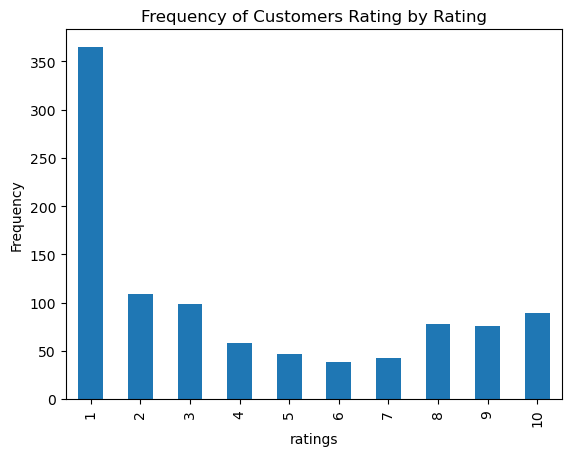

In [10]:
#verify the frequence of rating given by customers. We can noticed there are more customers rating 1 than any other number.
df_reviews.ratings.astype(int).value_counts().sort_index().plot(kind='bar')
plt.title("Frequency of Customers Rating by Rating")
plt.ylabel('Frequency');

In [11]:
import nltk #language
from nltk.corpus import stopwords #Eliminate some os not important word
import string
from nltk.stem import SnowballStemmer

In [12]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #select all in english

stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower() #all text in lower case
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+','',text)# eliminate http
    text = re.sub('<.*?>+','',text) #eliminate punctuation
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('✅ trip verified', '',text)
    text = [word for word in text.split(' ') if word not in  stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df_reviews["reviews_clean"] = df_reviews["reviews"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvidal1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df_reviews

reviews  ratings  \
0    ✅ Trip Verified |  Really terrible user experi...        3   
1    ✅ Trip Verified | Very impressed with BA. Chec...        9   
2    ✅ Trip Verified |  LHR - SFO, LAS - LGW August...        3   
3    Not Verified |   I flew from Malaga via LHR to...        2   
4    ✅ Trip Verified |  Milan to Miami return via L...        1   
..                                                 ...      ...   
995  ✅ Trip Verified |  London to Shanghai. The mos...        2   
996  ✅ Trip Verified | Their customer service is ho...        1   
997  ✅ Trip Verified |  London City to Zurich, I fl...        9   
998  ✅ Trip Verified |  I booked a flight from Buch...        1   
999  ✅ Trip Verified |  London to Calgary. Thank yo...       10   

                                         reviews_clean  
0       realli terribl user experi british airway w...  
1      impress ba check onlin littl convolut everyt...  
2       lhr  sfo las  lgw august  club world shame ...  
3    verifi    flew malaga via lhr boston  may  arr...  
4       milan miami return via london worst busi cl...  
..                                                 ...  
995     london shanghai disappoint busi class flown...  
996    custom servic horribl lost bag sit london  d...  
997     london citi zurich fli rout lot around  tim...  
998     book flight bucharest london return airport...  
999     london calgari thank jame club world flight...  

[1000 rows x 3 columns]

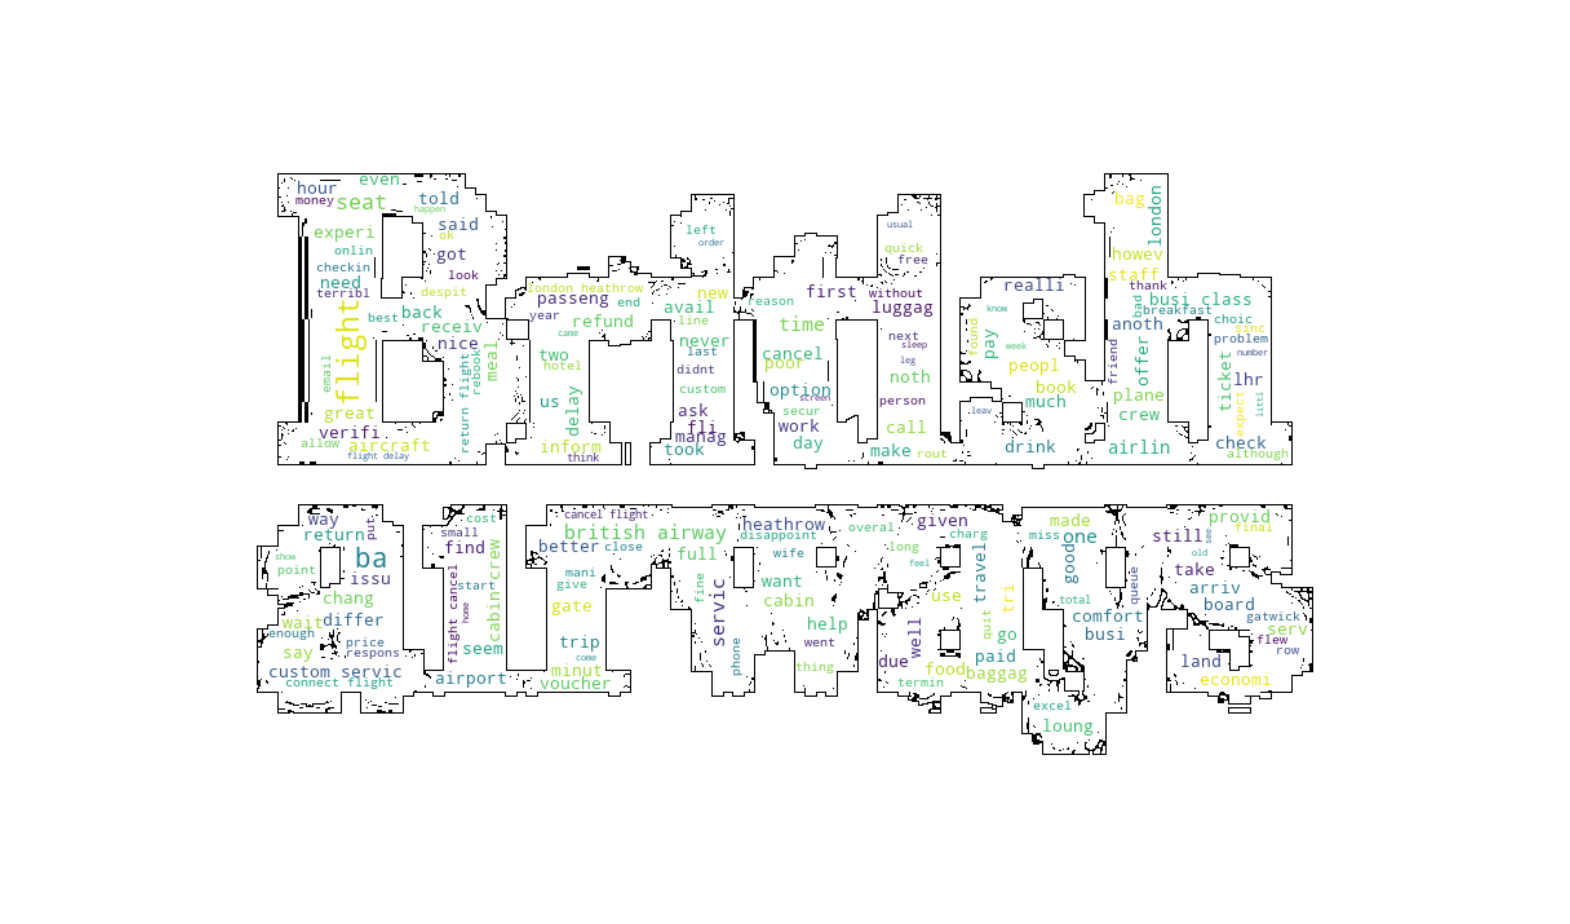

In [14]:
# create a wordCloud with backgroud image
from PIL import Image
from wordcloud import WordCloud

text = ' '.join(df_reviews['reviews_clean'])

# Load mask image
mask_image = np.array(Image.open("British-Airways-Logo-1973.jpg"))

# Create WordCloud object with specific mask
wordcloud = WordCloud(mask=mask_image, background_color="white",contour_color='black', contour_width=1).generate(text)

# Display the generated WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
df_reviews['reviews_clean']

0         realli terribl user experi british airway w...
1        impress ba check onlin littl convolut everyt...
2         lhr  sfo las  lgw august  club world shame ...
3      verifi    flew malaga via lhr boston  may  arr...
4         milan miami return via london worst busi cl...
                             ...                        
995       london shanghai disappoint busi class flown...
996      custom servic horribl lost bag sit london  d...
997       london citi zurich fli rout lot around  tim...
998       book flight bucharest london return airport...
999       london calgari thank jame club world flight...
Name: reviews_clean, Length: 1000, dtype: object

In [16]:
# Counts the frequence of each words appear on our dataset
from collections import Counter

def plot_bar(dataset,name):
    # Tokenize the text column into words
    all_words = []
    for text in dataset:
        words = text.lower().split()
        all_words.extend(words)
    
    # Remove punctuation
    all_words = [word.strip(string.punctuation) for word in all_words]
    
    # Remove stopwords and words with less than 3 letters
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in all_words if word not in stop_words and len(word) >= 3]
    
    # Count word frequencies
    word_freq = Counter(filtered_words)
    
    # Get the 10 most common words and their frequencies
    most_common = word_freq.most_common(20)
    print(most_common)
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*most_common))
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f"Top 20 Most Common Words {name}")
    plt.xticks(rotation=45)
    plt.show()


[('flight', 2192), ('seat', 927), ('servic', 770), ('time', 653), ('hour', 582), ('london', 514), ('crew', 456), ('airlin', 453), ('board', 451), ('get', 450), ('busi', 442), ('class', 442), ('food', 440), ('one', 437), ('good', 429), ('british', 428), ('airway', 421), ('staff', 396), ('cabin', 386), ('would', 377)]


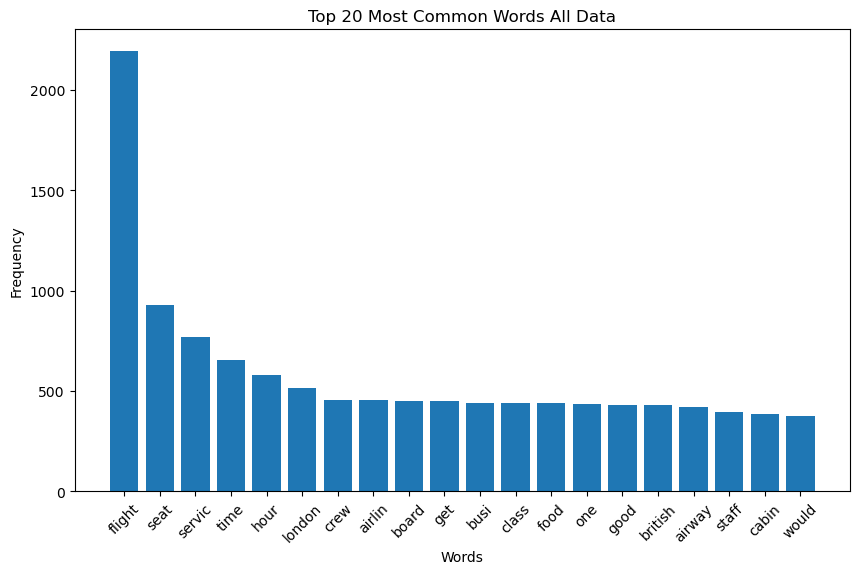

In [17]:
#this is the 20 most commom words on out whole dataset
plot_bar(dataset = df_reviews['reviews_clean'], name = "All Data")

In [18]:
# Manually create a list of words to be deleted
words_to_delete = ['flight', 'seat', 'servic', 'british', 'airway', 'book', 'london', 'airlin', 'time', 'call', 'day', 'told', 'would', 'one', 'airport'
                   , 'crew', 'board', 'cabin', 'arriv', 'seat', 'custom', 'get', 'bag', 'check', 'could', 'travel', 'back', 'class', 'heathrow', 'aircraft']
df_reviews['reviews_clean'] =df_reviews['reviews_clean'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in words_to_delete]))

[('hour', 300), ('cancel', 256), ('delay', 161), ('refund', 149), ('fli', 145), ('staff', 131), ('even', 129), ('never', 126), ('wait', 123), ('tri', 121), ('busi', 120), ('ticket', 116), ('connect', 103), ('chang', 102), ('luggag', 101), ('plane', 101), ('verifi', 100), ('phone', 99), ('rebook', 99), ('email', 97)]


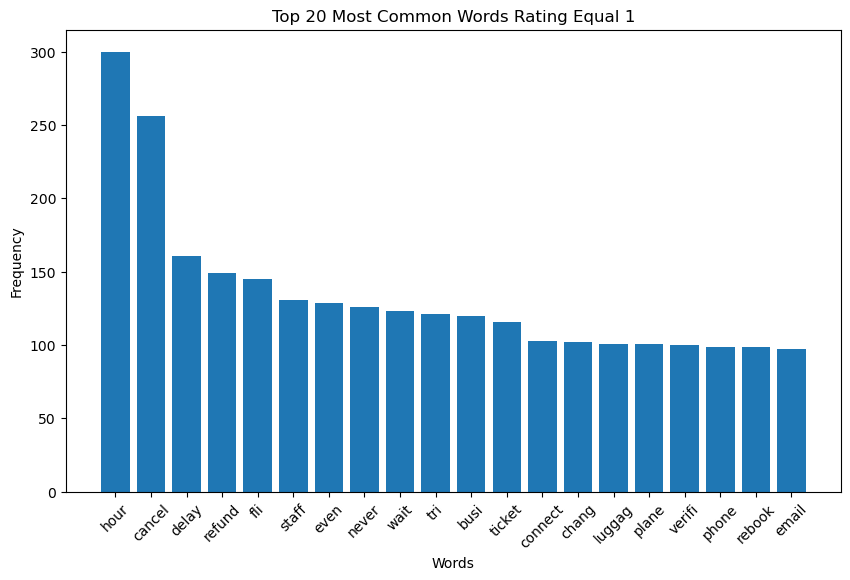

In [19]:
#this is the 20 most common words in our dataset with rating equal 1
df_lower_reviews = df_reviews[df_reviews['ratings']==1]
plot_bar(dataset = df_lower_reviews.reviews_clean, name = "Rating Equal 1")

[('good', 230), ('food', 156), ('drink', 93), ('great', 92), ('friend', 87), ('busi', 87), ('comfort', 87), ('club', 85), ('excel', 83), ('staff', 77), ('loung', 75), ('experi', 74), ('well', 70), ('realli', 70), ('first', 70), ('fli', 67), ('new', 64), ('hour', 62), ('offer', 61), ('help', 58)]


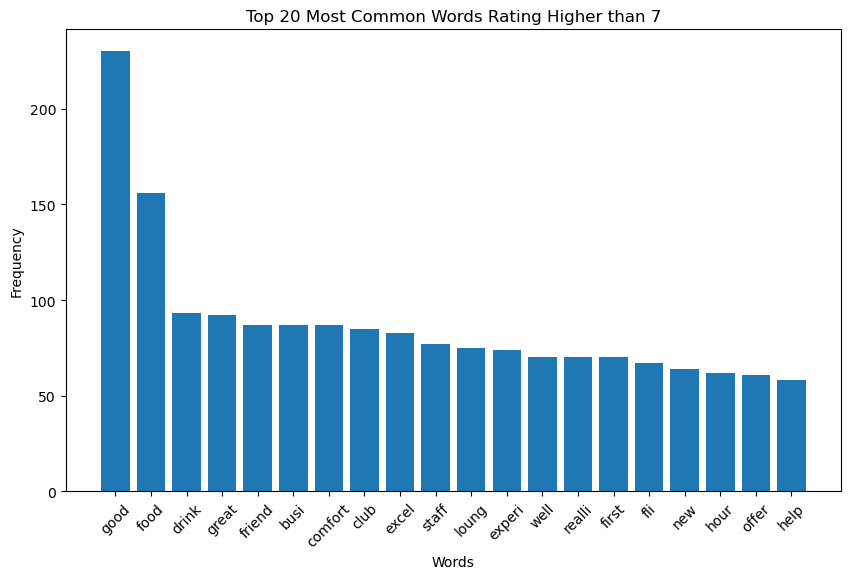

In [20]:
#this is the 20 most common words in our dataset with rating higher than 7
df_lower_reviews = df_reviews[df_reviews['ratings']>7]
plot_bar(dataset = df_lower_reviews.reviews_clean, name = "Rating Higher than 7")

## Data Manipulation

In [21]:
'''
    We are going to create 2 classes:
    Classe 0: all reviews with rating == 1
    Classe 1: all reviews with rating > 7

    This will bring us a more balanced data so we can start to train it.
'''

new_data = df_reviews[(df_reviews['ratings'] == 1) | (df_reviews['ratings'] > 7)]
new_data

reviews  ratings  \
1    ✅ Trip Verified | Very impressed with BA. Chec...        9   
4    ✅ Trip Verified |  Milan to Miami return via L...        1   
8    ✅ Trip Verified |  I have never seen such disr...        1   
9    ✅ Trip Verified |  Paid for a 14 hour long fli...        1   
10   ✅ Trip Verified |  Very inconsiderate PA annou...        1   
..                                                 ...      ...   
994  ✅ Trip Verified | Rome Fiumicino to London Cit...       10   
996  ✅ Trip Verified | Their customer service is ho...        1   
997  ✅ Trip Verified |  London City to Zurich, I fl...        9   
998  ✅ Trip Verified |  I booked a flight from Buch...        1   
999  ✅ Trip Verified |  London to Calgary. Thank yo...       10   

                                         reviews_clean  
1    impress ba onlin littl convolut everyth great ...  
4    milan miami return via worst busi ever layout ...  
8    never seen disrespect month unabl checkin webs...  
9    paid hour long ticket includ use inflight ente...  
10   inconsider pa announc made purser appear decid...  
..                                                 ...  
994  rome fiumicino citi ba cityfly wait full push ...  
996  horribl lost sit wear cloth fli hour barcelona...  
997  citi zurich fli rout lot around per year delay...  
998  bucharest return inform us delay hour anoth ho...  
999  calgari thank jame club world attend ba april ...  

[608 rows x 3 columns]

In [22]:
#create a new colunm that rating 1 == bad and rating>7 == good
new_data['rating_category'] = 10
new_data.loc[new_data['ratings'] == 1, 'rating_category'] = 0  # name every bad review as 0
new_data.loc[new_data['ratings'] > 7, 'rating_category'] = 1   # name every good review as 1
new_data

C:\Users\mvidal1\AppData\Local\Temp\ipykernel_14424\1968619136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['rating_category'] = 10


reviews  ratings  \
1    ✅ Trip Verified | Very impressed with BA. Chec...        9   
4    ✅ Trip Verified |  Milan to Miami return via L...        1   
8    ✅ Trip Verified |  I have never seen such disr...        1   
9    ✅ Trip Verified |  Paid for a 14 hour long fli...        1   
10   ✅ Trip Verified |  Very inconsiderate PA annou...        1   
..                                                 ...      ...   
994  ✅ Trip Verified | Rome Fiumicino to London Cit...       10   
996  ✅ Trip Verified | Their customer service is ho...        1   
997  ✅ Trip Verified |  London City to Zurich, I fl...        9   
998  ✅ Trip Verified |  I booked a flight from Buch...        1   
999  ✅ Trip Verified |  London to Calgary. Thank yo...       10   

                                         reviews_clean  rating_category  
1    impress ba onlin littl convolut everyth great ...                1  
4    milan miami return via worst busi ever layout ...                0  
8    never seen disrespect month unabl checkin webs...                0  
9    paid hour long ticket includ use inflight ente...                0  
10   inconsider pa announc made purser appear decid...                0  
..                                                 ...              ...  
994  rome fiumicino citi ba cityfly wait full push ...                1  
996  horribl lost sit wear cloth fli hour barcelona...                0  
997  citi zurich fli rout lot around per year delay...                1  
998  bucharest return inform us delay hour anoth ho...                0  
999  calgari thank jame club world attend ba april ...                1  

[608 rows x 4 columns]

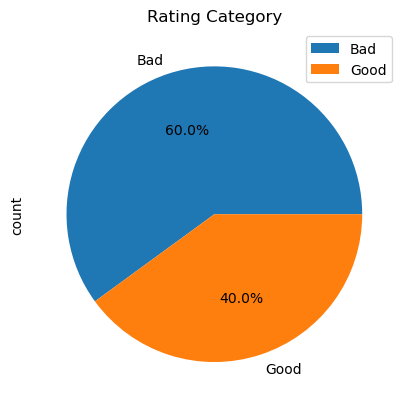

In [23]:
new_data.rating_category.value_counts().plot(kind = 'pie',legend=True, labels=['Bad','Good'],autopct='%1.1f%%')
plt.title("Rating Category");

In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 1 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews          608 non-null    object
 1   ratings          608 non-null    int64 
 2   reviews_clean    608 non-null    object
 3   rating_category  608 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.8+ KB


## Apply Machine Learning

In [25]:
#shuffle table
new_data = new_data.sample(frac=1).reset_index(drop=True)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = np.array(new_data['reviews_clean'])
y = np.array(new_data['rating_category'])

cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.20)

In [27]:
y_train.shape, y_test.shape

((486,), (122,))

In [28]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [29]:
pred = model.predict(X_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [30]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Confusion Matrix\n', confusion_matrix(y_test,pred))

print("\n",classification_report(y_test,pred))

print('Accuracy GradientBoostingClassifier: ', np.mean(np.equal(y_test, pred)))

Confusion Matrix
 [[72  2]
 [ 4 44]]

               precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.96      0.92      0.94        48

    accuracy                           0.95       122
   macro avg       0.95      0.94      0.95       122
weighted avg       0.95      0.95      0.95       122

Accuracy GradientBoostingClassifier:  0.9508196721311475


In [32]:
# Add by the user:
user = "I had a good time flying to London. The crew was great, and the food was delicious."
data = cv.transform([user]).toarray()
output = model.predict(data)
rating_pred = "Good Review" if output == 1 else "Bad Review"
print(rating_pred)

Good Review


In [33]:
# Add by the user:
user = "I had an horrible time flying to London. The crew were not polite and the food taste terrible."
data = cv.transform([user]).toarray()
output = model.predict(data)
rating_pred = "Good Review" if output == 1 else "Bad Review"
print(rating_pred)

Bad Review


## Checking Negative results

In [34]:
table = pd.DataFrame({"Y_test": y_test,
                      "Pred": pred})
table

Y_test  Pred
0         1     1
1         0     0
2         1     1
3         0     0
4         0     0
..      ...   ...
117       0     0
118       0     0
119       1     1
120       0     0
121       0     0

[122 rows x 2 columns]

In [35]:
table_negative = table[table["Y_test"] != table["Pred"]]
table_negative

Y_test  Pred
38        0     1
52        1     0
54        0     1
61        1     0
97        1     0
116       1     0

In [36]:
for i in table_negative.index:
    if table_negative["Pred"][i] == 1:
        print("\nFP - False Positive - It shows as Bad Reviews when it is a Good Review\n")
        print(new_data.loc[i][2])
    else:
        print("\nFN - False Negative - It shows as Good Reviews when it is a Bad Review\n")
        print(new_data.loc[i][2])




FP - False Positive - It shows as Bad Reviews when it is a Good Review

verifi good friday delay std atd durban south africa johannesburg announc made approach frame given simpli didnt know tow hanger johannesburg late filthi shall never fli comair includ kulula ba absolut shock

FN - False Negative - It shows as Good Reviews when it is a Bad Review

verifi like thank air best experi long journey don't know manag keep smile couldn't fault anyth help reassur excel food can't wait fli thank realli appreci

FP - False Positive - It shows as Bad Reviews when it is a Good Review

new york jfk anoth grim club tire old busi ba far worst industri dread ying yang configur go us sad entertain tini screen hd poor movi select wifi work usual food continu desper poor rather keen disappear quick need major overhaul invest new

FN - False Negative - It shows as Good Reviews when it is a Bad Review

easi staff member polit help made specif point acknowledg loyalti ba secur fast galleri north fine sho

C:\Users\mvidal1\AppData\Local\Temp\ipykernel_14424\2779879872.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(new_data.loc[i][2])
C:\Users\mvidal1\AppData\Local\Temp\ipykernel_14424\2779879872.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(new_data.loc[i][2])
